In [1]:
from collections import defaultdict
import math
import numpy as np
from numpy import ma
import datetime, time
from datetime import datetime
import netCDF4
from netCDF4 import Dataset, num2date

from matplotlib import pyplot as plt
from matplotlib import gridspec as gridspec
plt.style.use('ggplot')
%matplotlib notebook

import pickle
from scipy.interpolate import griddata
import os
from cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import halem
import halem.Flow_class as Flow_class

from scipy.spatial import Delaunay

In [2]:
nl = (1,1)
dx_min = 0.05
blend = 0.8


flow = halem.Flow_class.flow_NOOS('D:/Validatiecase TEXEL data (DCSMv6-ZUNOv4)/2018-05-08 060000.nc')
nodes_index, LS = halem.Mesh_maker.Get_nodes(flow, nl, dx_min, blend)

99.29 %


In [3]:
nodes = flow.nodes[nodes_index]
u = np.asarray(np.transpose(flow.u))[nodes_index]
v = np.asarray(np.transpose(flow.v))[nodes_index]
WD = np.asarray(np.transpose(flow.WD))[nodes_index]

In [4]:
class LineBuilder:
    def __init__(self, line):
        self.line = line
        self.xs = []
        self.ys = []
        self.cid = line.figure.canvas.mpl_connect('button_press_event', self)
        self.nodes = []

    def __call__(self, event):
        print('click', event)
        if event.inaxes!=self.line.axes: return
        self.xs.append(event.xdata)
        self.ys.append(event.ydata)
        self.line.set_data(self.xs, self.ys)
        self.line.figure.canvas.draw()
        self.nodes.append((event.xdata, event.ydata))

# Texel

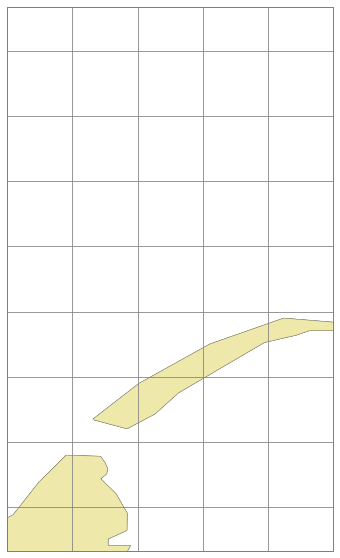

In [5]:
sta = 120
sto = -350

fig = plt.figure(figsize = (10,10))
ax = plt.subplot(projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m', color='black', linewidth=1)
ax.gridlines(color = 'grey', zorder = 3)
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', edgecolor='face', facecolor='palegoldenrod'))

line, = plt.plot([], [], 'b') # empty line
points, = plt.plot([],[], 'ro')
linebuilder = LineBuilder(line)
pointbuilder = LineBuilder(points)

ax.set_extent([4.8, 5.1, 53.1, 53.6])

plt.show()

In [6]:
np.array(linebuilder.nodes)[:,::-1]

IndexError: too many indices for array

In [7]:
    Texel = [[53.01448906,  4.72204283],
            [53.01922391,  4.7281305 ],
            [53.02395876,  4.73354175],
            [53.03072283,  4.74301145],
            [53.04019252,  4.75248115],
            [53.04560378,  4.76059803],
            [53.05439707,  4.7680385 ],
            [53.06319036,  4.78494868],
            [53.0767185 ,  4.79171275],
            [53.08754101,  4.797124  ],
            [53.09362867,  4.80388807],
            [53.10106915,  4.81132855],
            [53.10512759,  4.81876902],
            [53.11324447,  4.82553309],
            [53.12136135,  4.83364998],
            [53.12744902,  4.83906123],
            [53.13759512,  4.84853093],
            [53.1450356 ,  4.85664781],
            [53.15585811,  4.86611751],
            [53.16059296,  4.87017595],
            [53.16735702,  4.87558721],
            [53.17276828,  4.88302768],
            [53.12947824,  4.90264348],
            [53.11865573,  4.8850569 ],
            [53.10783321,  4.88167487],
            [53.09430508,  4.88032205],
            [53.08077694,  4.87694002],
            [53.07198365,  4.86747032],
            [53.06521958,  4.85867703],
            [53.06048473,  4.84988374],
            [53.05372066,  4.84311967],
            [53.047633  ,  4.83297357],
            [53.03883971,  4.82147465],
            [53.03275205,  4.81065214],
            [53.02666438,  4.80185885],
            [53.02125313,  4.79306556],
            [53.01448906,  4.78291946],
            [53.01043062,  4.77480257],
            [53.00501936,  4.75924521],
            [53.00163733,  4.75045192]]

    Den_Helder = [[52.83965774,  4.70512463],
                [52.85994995,  4.72271121],
                [52.88971185,  4.72947528],
                [52.91270969,  4.72947528],
                [52.93976596,  4.73488653],
                [52.95735254,  4.75382593],
                [52.95735254,  4.7808822 ],
                [52.95735254,  4.80117441],
                [52.95599973,  4.81064411],
                [52.93706034,  4.80117441],
                [52.92217938,  4.81199692],
                [52.90594562,  4.83093632],
                [52.90188718,  4.85528697],
                [52.89918155,  4.89046013],
                [52.89918155,  4.91886922],
                [52.90323999,  4.94457268],
                [52.91676813,  4.96215926],
                [52.92488501,  4.98109865],
                [52.92623782,  4.99192116]]

    vlieland = [[53.2238332 ,  4.89112216],
                [53.2212358 ,  4.89631696],
                [53.21863839,  4.90345982],
                [53.21733969,  4.91384943],
                [53.22448255,  4.92358969],
                [53.2303267 ,  4.93203125],
                [53.23552151,  4.935278  ],
                [53.24201502,  4.94112216],
                [53.24656047,  4.95086242],
                [53.25110593,  4.95605722],
                [53.25695008,  4.96255073],
                [53.26019683,  4.96709619],
                [53.26474229,  4.97618709],
                [53.26798904,  4.97943385],
                [53.27318385,  4.99112216],
                [53.2777293 ,  4.99956372],
                [53.27967735,  5.00345982],
                [53.28422281,  5.01320008],
                [53.28682021,  5.01709619],
                [53.29071631,  5.0287845 ],
                [53.29461242,  5.03917411],
                [53.30045657,  5.05216112],
                [53.30370333,  5.06709619],
                [53.30630073,  5.07813515],
                [53.30630073,  5.08982346],
                [53.30630073,  5.09696631],
                [53.31084619,  5.06839489],
                [53.31084619,  5.05865463],
                [53.30889813,  5.05151177],
                [53.30759943,  5.04761567],
                [53.30435268,  5.03722606],
                [53.30240463,  5.0326806 ],
                [53.29915787,  5.02553774],
                [53.29656047,  5.01774554],
                [53.29526177,  5.01125203],
                [53.29266437,  5.00540787],
                [53.29006696,  4.99696631],
                [53.28682021,  4.99047281],
                [53.28292411,  4.9800832 ],
                [53.27967735,  4.97553774],
                [53.2751319 ,  4.96839489],
                [53.2712358 ,  4.95930398],
                [53.26733969,  4.95475852],
                [53.26474229,  4.94956372],
                [53.25954748,  4.94112216],
                [53.25630073,  4.93462865],
                [53.25305398,  4.9313819 ],
                [53.24980722,  4.92229099],
                [53.24526177,  4.91774554],
                [53.24136567,  4.91060268],
                [53.23811891,  4.90670657],
                [53.23422281,  4.90216112],
                [53.229028  ,  4.89501826]]

    Tesrschelling = [[53.39630783,  5.26332894],
                    [53.39546368,  5.25404322],
                    [53.39208705,  5.23800426],
                    [53.39039874,  5.22871855],
                    [53.38786627,  5.22027699],
                    [53.38786627,  5.21267959],
                    [53.3836455 ,  5.20170556],
                    [53.38195718,  5.193264  ],
                    [53.38026887,  5.18904322],
                    [53.37435978,  5.18060166],
                    [53.37182731,  5.1780692 ],
                    [53.36338575,  5.17722504],
                    [53.3625416 ,  5.18144582],
                    [53.36085329,  5.193264  ],
                    [53.36085329,  5.20001725],
                    [53.36085329,  5.2067705 ],
                    [53.36169744,  5.21267959],
                    [53.36422991,  5.21605621],
                    [53.36422991,  5.22027699],
                    [53.36676238,  5.23125101],
                    [53.36845069,  5.23462764],
                    [53.36845069,  5.23884842],
                    [53.370139  ,  5.2430692 ],
                    [53.370139  ,  5.2506666 ],
                    [53.37267147,  5.25235491],
                    [53.37351563,  5.25488738],
                    [53.37604809,  5.26079647],
                    [53.37604809,  5.26923803],
                    [53.3777364 ,  5.2793679 ],
                    [53.3777364 ,  5.28443283],
                    [53.38195718,  5.28949777],
                    [53.38617796,  5.30975751],
                    [53.39039874,  5.32241985],
                    [53.3912429 ,  5.32917309],
                    [53.39208705,  5.34014712],
                    [53.39546368,  5.34943283],
                    [53.39715199,  5.35871855],
                    [53.3988403 ,  5.36462764],
                    [53.39968446,  5.37813413],
                    [53.40137277,  5.38235491],
                    [53.40390524,  5.39248478],
                    [53.40390524,  5.39501725],
                    [53.40559355,  5.40430296],
                    [53.40728186,  5.41190037],
                    [53.40981433,  5.42371855],
                    [53.40981433,  5.43384842],
                    [53.40981433,  5.44228998],
                    [53.41150264,  5.45241985],
                    [53.41150264,  5.45748478],
                    [53.41572342,  5.46845881],
                    [53.42669744,  5.46761465],
                    [53.43260653,  5.47099127],
                    [53.43429485,  5.48703024],
                    [53.43598316,  5.49631595],
                    [53.43935978,  5.51319907],
                    [53.43935978,  5.51488738],
                    [53.44020394,  5.5258614 ],
                    [53.4427364 ,  5.53767959],
                    [53.44358056,  5.55540686],
                    [53.44695718,  5.56638088],
                    [53.43767147,  5.55625101],
                    [53.43429485,  5.54105621],
                    [53.43429485,  5.5317705 ],
                    [53.43260653,  5.52417309],
                    [53.43176238,  5.50475751],
                    [53.43091822,  5.49125101],
                    [53.40052861,  5.27599127],
                    [53.40306108,  5.2945627 ],
                    [53.40559355,  5.30384842],
                    [53.40728186,  5.3156666 ],
                    [53.40728186,  5.32579647],
                    [53.40897017,  5.33592634],
                    [53.40897017,  5.34014712],
                    [53.40897017,  5.34943283],
                    [53.41065848,  5.36040686],
                    [53.41150264,  5.37138088],
                    [53.41319095,  5.38235491],
                    [53.41487926,  5.38573153],
                    [53.41741173,  5.39670556],
                    [53.41741173,  5.40767959],
                    [53.4199442 ,  5.41780946],
                    [53.42500913,  5.42793933],
                    [53.42500913,  5.43216011],
                    [53.42838575,  5.44819907],
                    [53.43007407,  5.45832894],
                    [53.43091822,  5.46423803],
                    [53.39630783,  5.2717705 ],
                    [53.40221692,  5.2869653 ],
                    [53.39461952,  5.24813413],
                    [53.38617796,  5.30047179]]

nodes_on_land = np.concatenate((Texel, Den_Helder,vlieland,Tesrschelling))

zero = np.zeros((len(nodes_on_land),WD.shape[1]))
new_nodes = np.concatenate((nodes, nodes_on_land))
new_u = np.concatenate((u, zero))
new_v = np.concatenate((v, zero))
new_WD = np.concatenate((WD, zero))

In [8]:
tria = Delaunay(new_nodes)

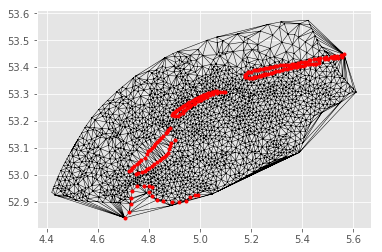

In [9]:
plt.triplot(new_nodes[:,1], new_nodes[:,0], tria.simplices, linewidth = 0.5, color = 'k', label = 'Delauney edges')

plt.plot(nodes_on_land[:,1], nodes_on_land[:,0], 'r.')

In [10]:
len(new_nodes)**0.5 , len(nodes)**0.5

(45.05552130427524, 42.7551166528639)

In [11]:
WD.shape[1]

36